### Finding dataset in local repository

In [1]:
import aoai

In [2]:
ds: aoai.Dataset = aoai.Dataset()

dataset_train = ds.get("fraudTrain.csv")[0]
dataset_test = ds.get("fraudTest.csv")[0]

In [3]:
dataset_test, dataset_train

('C:\\Users\\91930\\Documents\\github-deaxparadox\\ArtOfAI\\dataset\\credit-card-fraud\\fraudTest.csv',
 'C:\\Users\\91930\\Documents\\github-deaxparadox\\ArtOfAI\\dataset\\credit-card-fraud\\fraudTrain.csv')

In [4]:
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset and Data Preprocessing

In [5]:
df = pd.read_csv(dataset_train)

In [6]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Data Frame information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

Shape of data frame

In [9]:
df.shape

(1296675, 23)

Display all column in *df*

In [10]:
df.iloc[:1, :15]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781


In [11]:
df.iloc[:1, 15:]

,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0


Checking **null** values

In [12]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

# Fraud transactions

In [14]:
df_fraud = df[df['is_fraud'] == 1]

In [15]:
df_fraud.iloc[:1, :15]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266


In [16]:
df_fraud.iloc[:1, 15:]

,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1


### Total Fraud Transaction

In [17]:
number_transactions = len(df)
number_of_fraud = len(df_fraud)
number_of_not_fraud = len(df[df['is_fraud'] == 0])

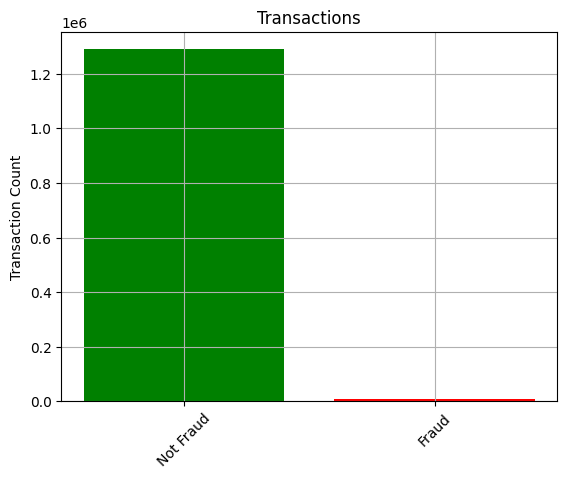

In [18]:
transactions = ['Not Fraud', "Fraud"]
transactions_count = [number_of_not_fraud, number_of_fraud]

color = ['green', 'red']

fig, ax = plt.subplots()
ax.bar(transactions, transactions_count, color=color)
ax.set_title("Transactions")
ax.set_ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [19]:
per_fraud = (number_of_fraud/number_transactions)  *100
per_not_fraud = (number_of_not_fraud/number_transactions)  *100

print("Percentage of Not Fraud: {}".format(per_not_fraud))
print("Percentage of Fraud: {}".format(per_fraud))

Percentage of Not Fraud: 99.42113482561166
Percentage of Fraud: 0.5788651743883394


### Fraud transactions category

In [20]:
category, category_count = [], []
for c, cc in df_fraud['category'].value_counts().items():
    category.append(c),
    category_count.append(cc)

print(category)
print(category_count)

['grocery_pos', 'shopping_net', 'misc_net', 'shopping_pos', 'gas_transport', 'misc_pos', 'kids_pets', 'entertainment', 'personal_care', 'home', 'food_dining', 'grocery_net', 'health_fitness', 'travel']
[1743, 1713, 915, 843, 618, 250, 239, 233, 220, 198, 151, 134, 133, 116]


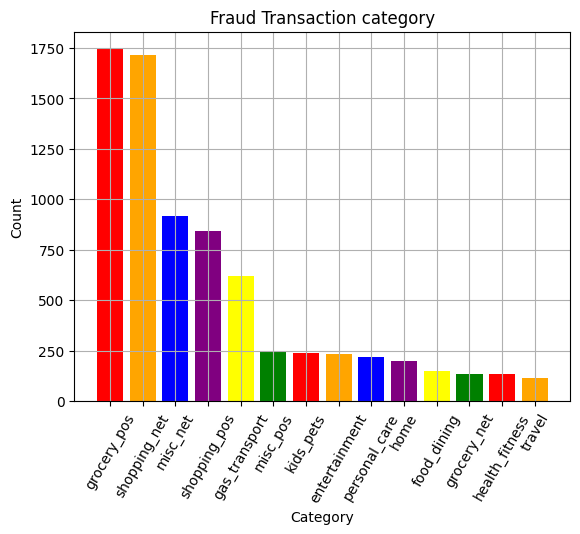

In [21]:
bar_colors = ['red', 'orange', 'blue', 'purple', 'yellow', 'green']

fig, ax = plt.subplots()
ax.bar(category, category_count, color=bar_colors)
ax.set_title("Fraud Transaction category")
ax.set_ylabel("Count")
ax.set_xlabel("Category")
plt.xticks(rotation=60)
plt.grid()
plt.show()

Most of fraudulent transactions happen in `Grocery` and `Shipping`.

### Fraud Transaction gender

In [22]:
gender, gender_count = [], []
for x, y in df_fraud['gender'].value_counts().items():
    gender.append(x)
    gender_count.append(y)

In [23]:
gender, gender_count

(['M', 'F'], [3771, 3735])

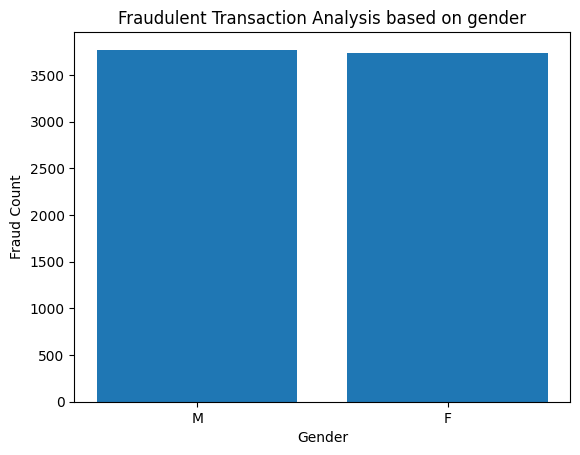

In [24]:


fig, ax = plt.subplots()
ax.bar(gender, gender_count)
ax.set_title("Fraudulent Transaction Analysis based on gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Fraud Count")
# ax.set_xticks(rotation=45)
plt.show()

As we can we see there both **Male** and **Female** are equally responsible for criminal charges.

Checking on Fraudulent transaction alone, didn't gives any result. Moving forward to apply algorithm to find and identify optimal solutions.

In [25]:
# removing unnessary features

df = df.drop(columns=["Unnamed: 0", "trans_num", "street"])
df.iloc[:1, :]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0


In [26]:
# selecting first 5,000 rows

df_5 = df.head(n=5000)
df_5['is_fraud'].value_counts()

# where
# 1 -> fraud
# 0 -> not fraud

is_fraud
0    4978
1      22
Name: count, dtype: int64

In [27]:
df_processed = pd.get_dummies(data=df_5)

In [28]:
df_processed.shape

(5000, 8622)

In [29]:
df_processed

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,dob_2001-07-05,dob_2001-07-26,dob_2001-12-19,dob_2003-05-07,dob_2003-09-14,dob_2004-03-18,dob_2004-05-08,dob_2004-06-19,dob_2004-12-30,dob_2005-01-29
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,...,False,False,False,False,False,False,False,False,False,False
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,...,False,False,False,False,False,False,False,False,False,False
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,...,False,False,False,False,False,False,False,False,False,False
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,...,False,False,False,False,False,False,False,False,False,False
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2235335206132667,1180.30,45896,40.6072,-83.9585,2089,1325653789,40.438221,-83.485925,0,...,False,False,False,False,False,False,False,False,False,False
4996,375237305371366,83.47,14445,43.1128,-77.4906,8019,1325653953,42.415407,-78.158282,0,...,False,False,False,False,False,False,False,False,False,False
4997,2235335206132667,36.64,45896,40.6072,-83.9585,2089,1325654003,40.958936,-84.629338,0,...,False,False,False,False,False,False,False,False,False,False
4998,502012776709,6.21,13342,42.6315,-75.1866,165,1325654086,43.269532,-76.124026,0,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# checking for duplicated entries

df.duplicated().any()

False

In [31]:
x_train = df_processed.drop(columns=['is_fraud'], axis=1)
y_train = df_processed['is_fraud']

In [32]:
x_train.shape

(5000, 8621)

### Test Dataset

In [33]:
df_test = pd.read_csv(dataset_test)
df_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [34]:
# preprocessing test dataset

df_test.drop(columns=['Unnamed: 0', 'trans_num', 'street'], inplace=True)
# df_test

In [35]:
df_test_5 = df_test.sample(frac=1, random_state=1).reset_index()
df_test_5 = df_test_5.head(n=5000)
df_test_5.is_fraud.value_counts()

# df_test_5 = df_test.head(n=5000)
# df_test_5['is_fraud'].value_counts()

is_fraud
0    4979
1      21
Name: count, dtype: int64

In [36]:
df_processed_test = pd.get_dummies(data=df_test_5)

In [37]:
list(df_processed_test.columns)

['index',
 'cc_num',
 'amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'trans_date_trans_time_2020-06-21 12:18:27',
 'trans_date_trans_time_2020-06-21 12:52:46',
 'trans_date_trans_time_2020-06-21 14:17:35',
 'trans_date_trans_time_2020-06-21 16:23:30',
 'trans_date_trans_time_2020-06-21 17:43:07',
 'trans_date_trans_time_2020-06-21 18:27:17',
 'trans_date_trans_time_2020-06-21 18:47:22',
 'trans_date_trans_time_2020-06-21 18:57:17',
 'trans_date_trans_time_2020-06-21 18:59:31',
 'trans_date_trans_time_2020-06-21 19:07:32',
 'trans_date_trans_time_2020-06-21 19:11:44',
 'trans_date_trans_time_2020-06-21 19:23:15',
 'trans_date_trans_time_2020-06-21 19:46:53',
 'trans_date_trans_time_2020-06-21 20:07:21',
 'trans_date_trans_time_2020-06-21 20:47:58',
 'trans_date_trans_time_2020-06-21 20:58:20',
 'trans_date_trans_time_2020-06-21 22:12:28',
 'trans_date_trans_time_2020-06-21 22:18:01',
 'trans_date_trans_time_2020-06-21 23:49:58',
 't

In [38]:
df_processed_test.shape

(5000, 8700)

In [42]:
x_test = df_processed.drop(columns='is_fraud', axis=1)
y_test = df_processed['is_fraud']

# Model Training and Evaluation

### Logistic Regression

In [40]:
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [43]:
predictions = lr.predict(x_test)

In [44]:
accuracy_score(y_test, predictions)

0.9956

In [45]:
# checking f1 score

f1_score(y_test, predictions)


0.0

In [46]:
# consfusion matrix

confusion_matrix(y_test, predictions)

array([[4978,    0],
       [  22,    0]], dtype=int64)

In [47]:
# classification report

report = classification_report(y_test, predictions)
print (report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4978
           1       0.00      0.00      0.00        22

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.99      1.00      0.99      5000



c:\Users\91930\Documents\github-deaxparadox\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91930\Documents\github-deaxparadox\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91930\Documents\github-deaxparadox\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

### KNN

In [48]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
preditions = knn.predict(x_test)

In [50]:
accuracy_score(y_test, predictions)

0.9956

In [51]:
cr = classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4978
           1       0.00      0.00      0.00        22

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.99      1.00      0.99      5000



c:\Users\91930\Documents\github-deaxparadox\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91930\Documents\github-deaxparadox\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91930\Documents\github-deaxparadox\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh